

### 계단함수

In [ ]:
# 계단함수 (넘파이 배열 가능하도록)
import numpy as np

def step_function(x) :
    y = x > 0                   # y : array[False, True, True], dtype=bool
    return y.astype(np.int)     # y : array[0,1,1]

x = np.array([-1.0, 1.0, 2.0])

step_function(x)

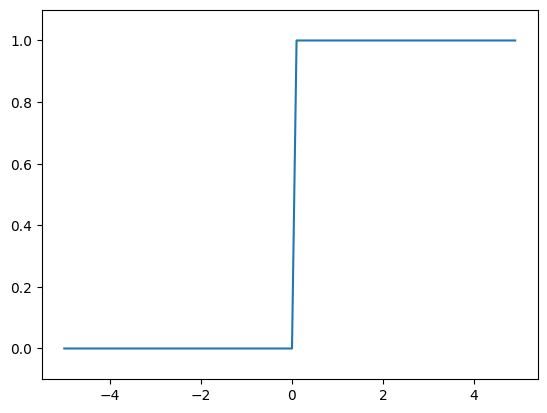

In [3]:
# 계단함수 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function2(x) :
    return np.array(x>0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function2(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

******
### 시그모이드 함수

[0.00669285 0.99330715 0.52497919]


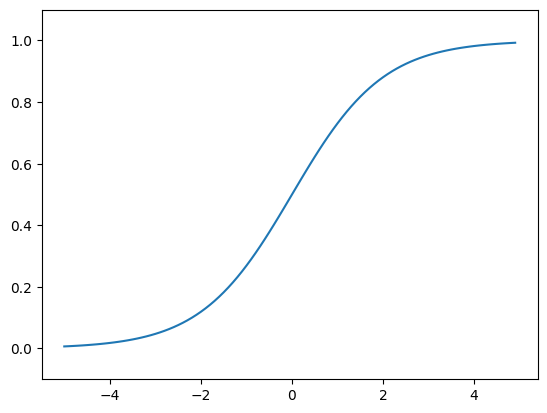

In [8]:
import numpy as np

def sigmoid(x) :
    return 1/(1+np.exp(-x))

x = np.array([-5.0, 5.0, 0.1])
print(sigmoid(x))

x2 = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x2)

# 시그모이드 그래프
plt.plot(x2,y)
plt.ylim(-0.1, 1.1)
plt.show()

****
### ReLU

In [ ]:
def relu(x) :
    return np.maximum(0,x)  # 두 입력 중 큰 값을 선택하여 반환

*****
### 다차원 배열

In [17]:
import numpy as np

A = np.array([1,2,3,4])     # 1차원배열
np.ndim(A)                  # 1
A.shape                     # [4,]
A.shape[0]                  # 4

B = np.array([[1,2],[3,4],[5,6]])
np.ndim(B)
B.shape

(3, 2)

In [20]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

B = np.array([[1,2],[3,4],[5,6]])
B.shape

np.dot(A,B)     # 두 행렬의 곱

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])

print(A,B)

np.dot(A,B)

[[1 2]
 [3 4]
 [5 6]] [7 8]


array([23, 53, 83])

In [34]:
# 3층 신경망
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
# print(A1)

def sigmoid(x) :
    return 1/(1+np.exp(-x))

Z1 = sigmoid(A1)
# print(Z1)

W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2 

def identity_function(x) : 
    return X

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)
Y = identity_function(A3)       # 또는 Y = A3
Y

array([1. , 0.5])

In [ ]:
import numpy as np

'''
입력층(0층) 2개, 첫 번째 은닉층(1층) 3개, 두 번째 은닉층(2층) 2개, 출력층(3층) 2개의 뉴런으로 구성.
1, 2층의 활성화 함수 : 시그모이드
3층의 활성화 함수 : 항등함수

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.
예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드 함수,
다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.
'''


# 3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# 항등함수
def identity_function(x):
    return x


# 3.4.3 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):        # 다층 퍼셉트론 
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)


****
### 소프트맥스 함수
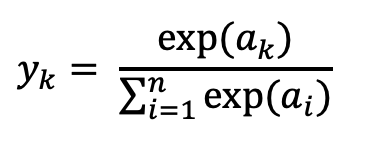

In [37]:
import numpy as np

a = np.array([0.3, 2.9, 4.0])

def softmax(a) :
    exp_a = np.exp(a)
    # print(exp_a)
    sum_exp_a = np.sum(exp_a)       # 지수함수의 합 = 소프트맥스 함수의 분모
    # print(sum_exp_a)
    y = exp_a / sum_exp_a
    # print(y)

    return y

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


#### "오버플로" 문제 발생
- 지수함수에 의해 큰 값이 반환되어 이 값들끼리 나눗셈을 수행하면 결과 수치가 불안정
- 오버플로 : 표현할 수 있는 수의 범위가 한정되어 너무 큰 값을 표현할 수 없음 
- 개선한 수식

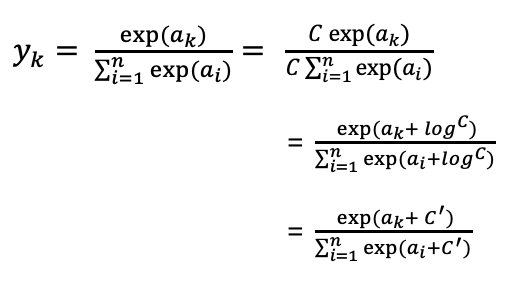

-> 소프트맥스의 지수함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않음

-> 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용

In [48]:
# 오버플로 예방 예시
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))       # 소프트맥스 함수 계산
# 위 계산 결과 : array([nan, nan, nan]) => 제대로 계산되지 않음 (overflow)

c = np.max(a)       # c = 1010(최댓값)
a - c               # array([  0, -10, -20])

np.exp(a-c) / np.sum(np.exp(a-c))   # array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09]) 
# 모든 입력값에서 최댓값을 뺀 후 계산하면 정상적으로 계산됨


# 이를 이용하여 소프트맥스 함수 수정

def softmax_alter(a) : 
    c = np.max(X)
    exp_a = np.exp(a-c)     # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y 

print(softmax_alter(x), np.sum(softmax_alter(x)))
# 소프트맥스 함수의 출력은 0~1 사이의 실수 & 함수 출력의 총합은 1 ****** ==> 출력을 '확률'로 해석 가능


[4.50623236e-05 9.92563729e-01 7.39120826e-03] 1.0000000000000002


C:\Users\USER\AppData\Local\Temp\ipykernel_26292\1426612558.py:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))       # 소프트맥스 함수 계산
C:\Users\USER\AppData\Local\Temp\ipykernel_26292\1426612558.py:3: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))       # 소프트맥스 함수 계산


*******************
### 손글씨 숫자 인식

In [1]:
import sys
import os
import pickle
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


# 3.6.1 MNIST 데이터셋
'''
0~9 숫자 이미지로 구성.
훈련 이미지 60000장, 시험 이미지 10000장
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
레이블은 정답에 해당하는 숫자
'''
# 처음 한 번은 몇 분 정도 걸림
# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

ModuleNotFoundError: No module named 'dataset'

In [ ]:
# 3.6.2 신경망의 추론 처리
'''
입력층 784개, 출력층 10개,
은닉층 50개, 100개로 구성(임의)
'''


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0

'''
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352
'''

In [ ]:
# 3.6.3 배치 처리
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

****
### MNIST

In [51]:
from keras.src.datasets.mnist import load_data

In [53]:
import sys
import os
import pickle
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


# 3.6.1 MNIST 데이터셋
'''
0~9 숫자 이미지로 구성.
훈련 이미지 60000장, 시험 이미지 10000장
28*28 크기의 회색조 이미지이며 각 픽셀은 0~255의 값을 가짐
레이블은 정답에 해당하는 숫자
'''
# 처음 한 번은 몇 분 정도 걸림
# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

ModuleNotFoundError: No module named 'common'

In [ ]:
# 3.6.2 신경망의 추론 처리
'''
입력층 784개, 출력층 10개,
은닉층 50개, 100개로 구성(임의)
'''


def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0

'''
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352
'''

In [ ]:
# 3.6.3 배치 처리
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

**********************
QUIZ

In [2]:
# 1. 주어진 np행렬의 곱 코드의 오류를 수정

'''기존코드

import numpy as np

A = np.array([1,2,3,4])
B = np.array([[5,6,7,8],[9,10,11,12]])
print(np.dot(A,B))
'''

### dot(점곱)이 아니라 행렬의 곱 * 을 사용하여 연산한다면 브로드캐스트 작동

# 수정 1 : 연산 행과 열이 4가 되도록

import numpy as np

A = np.array([1,2,3,4])
B = np.array([[5,6],[7,8],[9,10],[11,12]])

print('alter1 : ', np.dot(A,B))


# 수정 2 : 연산 행과 열이 2가 되도록
import numpy as np

A = np.array([1,2],[3,4])
B = np.array([[5,6,7,8],[9,10,11,12]])

print('alter2 : ', np.dot(A,B))

[ 90 100]


In [1]:
# 2. 4차원 신경망 만들기
# 3층 신경망 코드 기반
# w4, b4 추가
# 결과값 지정 x 

import numpy as np

# 3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 항등함수
def identity_function(x):
    return x

# 3.4.3 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['W4'] = np.array([[0.5, 0.6], [0.7, 0.8]])              # W4 추가
    
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([0.1, 0.2])
    network['b4'] = np.array([0.2, 0.3])                            # b4 추가

    return network

def forward(network, x):
    W1, W2, W3, W4 = network['W1'], network['W2'], network['W3'], network['W4']     # W4
    b1, b2, b3, b4 = network['b1'], network['b2'], network['b3'], network['b4']     # b4

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    z3 = sigmoid(a3)                    # 3층 신경망의 결과 저장
    a4 = np.dot(z3, W4) + b4            # 이를 추가한 가중치 및 편향값으로 계산
    y = identity_function(a4)           # 4층신경망 결과 도출

    return y

network = init_network()
x = np.array([1.0,0.5])     #  x1 = 1.0 , x2 = 0.5
y = forward(network, x)     # 기존값(3층신경망) = [0.31682708  0.69627909]

print(y)

[0.95642899 1.1810203 ]


***
### 추가 퀴즈

1. 활성화함수가 미분함수(비선형함수)여야 하는 이유는?

- 선형함수는 '은닉층이 없는 네트워크'와 같음
- 선형함수는 출력이 입력의 상수배만큼 변함 (정형적, 연속성이 적음)
- 비선형함수는 비정형적, 연속적
- 은닉층(여러 개의 층의 이점)을 이용하기 위해서는 비선형함수를 이용해야 함

2. 지도학습의 분류와 회귀가 무엇인가?
    1) 분류와 회귀의 데이터(자료) 구조와 유형은 각각 어떻게 되는가?

- 분류
    - 분류는 데이터가 어떤 클래스(분야, 종류 등)에 속하는지를 결정하는 문제
    - 분류의 데이터 : 하나 이상의 특징을 가지며, 각각 명확한 범주(Class)에 속하는 데이터
    - 분류의 출력 : 이산적인(명확한) 클래스 레이블 또는 클래스에 속할 확률
    - 분류의 유형 : 이진 분류(Binary Classification), 다중 분류(Multi-Class Classification)

- 회귀
    - 회귀는 입력 데이터에서 (연속적인) 수치를 예측하는 문제
    - 회귀의 데이터 : 하나 이상의 특징을 가지며 연속적인 값을 가지는 데이터
    - 회귀의 출력 : 연속적인 수치 값
    - 회귀의 유형 : 단일 회귀(Simple Regression), 다중 회귀(Multiple Regression)

3. 분류 3층 신경망을 파이썬으로 구현하고 해당 구조를 만족하는 Input data를 찾아서(최소 10,000개 이상이며, 독립변수와 종속변수를 모두 가지고 있는 데이터를 찾을 것) 신경망에 입력한 결과값을 도출하시오 (층별 가중치와 Bias는 0~1사이 숫자를 랜덤 생성할 것)
    1) 신경망 구조
        - 입력층의 뉴런 25개, 첫번째 은닉층의 뉴런 50개, 두번째 은닉층의 뉴런 5개, 출력층의 뉴런 5개 (아래 구조 참조)
        - 출력층 뉴런의 활성화 함수는 softmax, 은닉층 뉴런의 활성화 함수는 sigmoid
    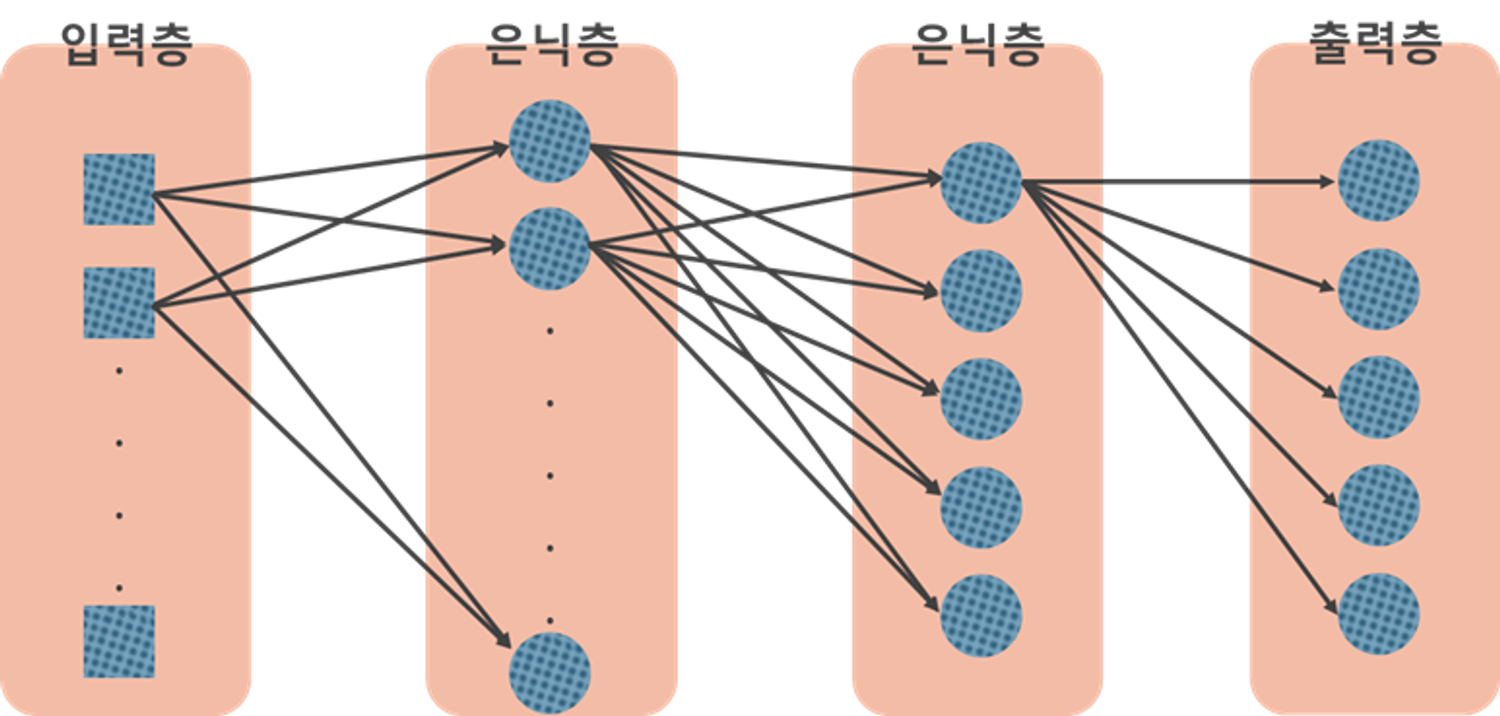
    - 아래 코드 구현

4. 찾은 Input data를 100개씩 랜덤 샘플링을 30회 시행하여 위 신경망에 대한 평균 Accuracy를 구하고 왜 그러한 값이 도출되었는지 설명하시오.
    

***
- Garbage dataset

In [2]:
import numpy as np
from PIL import Image
import os
import pandas as pd

base_dir = "C:/Users/USER/Desktop/학부연구/밑바닥부터 시작하는 딥러닝/archive (3)/GARBAGE DATASET/GARBAGE DATASET/"
categories = ["CLOTHES", "GLASS", "METAL", "PAPER", "PLASTIC"]

# 학습 및 테스트 데이터를 불러옵니다.
def load_data(categories, base_dir, dataset_type="train"):
    data = []
    labels = []
    
    for category in categories:
        # 각 카테고리에 대한 디렉토리 경로를 설정합니다.
        dir_path = os.path.join(base_dir, dataset_type, category)
        
        # 해당 디렉토리에 있는 모든 이미지 파일을 읽습니다.
        for filename in os.listdir(dir_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # 이미지 파일의 경로를 생성합니다.
                file_path = os.path.join(dir_path, filename)
                
                # 이미지를 열고 RGB로 변환합니다. 이렇게 하면 모든 이미지가 동일한 채널 수를 갖게 됩니다.
                image = Image.open(file_path).convert('RGB')
                image = image.resize((128, 128)) # 예시로 128x128 사이즈로 조정
                
                # 이미지를 numpy 배열로 변환합니다.
                image_array = np.array(image)
                
                # 데이터와 레이블 리스트에 추가합니다.
                data.append(image_array)
                labels.append(category)
    
    # 데이터와 레이블을 numpy 배열로 변환합니다.
    data = np.array(data)
    labels = np.array(labels)
    
    return data, labels


# 데이터 정규화
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# 필요한 경우, one-hot 인코딩으로 변환
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)



NameError: name 'train_labels' is not defined

In [20]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# 활성화 함수 및 기타 필요한 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    exp_a = np.exp(a - np.max(a))  # 오버플로 방지
    sum_exp_a = np.sum(exp_a, axis=1, keepdims=True)
    y = exp_a / sum_exp_a
    return y

def compute_accuracy(y_pred, y_true):
    predictions = np.argmax(y_pred, axis=1)
    accuracy = np.mean(predictions == y_true)
    return accuracy

def forward(network, x):
    W1, b1 = network['W1'], network['b1']
    W2, b2 = network['W2'], network['b2']
    W3, b3 = network['W3'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

def initialize_network(input_size, hidden_size1, hidden_size2, output_size):
    np.random.seed(42)
    return {
        'W1': np.random.rand(input_size, hidden_size1),
        'b1': np.random.rand(hidden_size1),
        'W2': np.random.rand(hidden_size1, hidden_size2),
        'b2': np.random.rand(hidden_size2),
        'W3': np.random.rand(hidden_size2, output_size),
        'b3': np.random.rand(output_size)
    }

# 네트워크 및 데이터 로드 (예시 데이터 사용)
input_size = 128 * 128 * 3  
hidden_size1 = 50
hidden_size2 = 5
output_size = 5
network = initialize_network(input_size, hidden_size1, hidden_size2, output_size)

# 레이블 인코딩 (실제 데이터에 맞게 조정 필요)
label_encoder = LabelEncoder()
train_labels = np.array(['PAPER', 'GLASS', 'METAL', 'PLASTIC', 'CLOTHES'])  # 예시 레이블
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels_one_hot = to_categorical(train_labels_encoded, num_classes=output_size)

# 랜덤 샘플링 및 정확도 계산 (예시 데이터 사용)
np.random.seed(42)
train_data = np.random.rand(1000, input_size)


In [21]:
sample_size = min(100, len(train_labels_encoded))

accuracies = []
for _ in range(30):
    indices = np.random.choice(len(train_labels_encoded), sample_size, replace=False)
    sample_images = train_data[indices].reshape(sample_size, -1)
    sample_labels = train_labels_encoded[indices]

    output = forward(network, sample_images)
    y_true = to_categorical(sample_labels, num_classes=output_size)

# 전체 데이터에 대해 순전파 실행
full_output = forward(network, train_data.reshape(len(train_data), -1))

# 예측 결과
y_pred = np.argmax(full_output, axis=1)

# 실제 레이블 (정수 인코딩)
y_true = train_labels_encoded

# 정확하게 분류된 데이터의 수 계산
correct_predictions = np.sum(y_pred == y_true)

# 정확도 계산
accuracy = correct_predictions / len(train_data)
accuracy


C:\Users\USER\AppData\Local\Temp\ipykernel_26844\1842157598.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  correct_predictions = np.sum(y_pred == y_true)


0.0